LDA topic model for content in each category

source: https://developer.ibm.com/tutorials/awb-lda-topic-modeling-text-analysis-python/

In [1]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models as gensimvisualize

In [2]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

LDA model for all documents

In [ ]:
# LDA modeling for all documents
data = pd.read_csv('/Users/beenayaknon/Desktop/pyget/dataset/category_with_document.csv')

data['processed_Document'] = data['Document'].apply(preprocess_text)
texts = data['processed_Document'].tolist()

# load dictionary
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below = 2)

# generate corpus as BoW
corpus = [dictionary.doc2bow(text) for text in texts]

# train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, random_state=4583, chunksize=20, num_topics=5, passes=200, iterations=400)

for topic in lda_model.print_topics(num_topics=5, num_words=10):
    print(topic)

coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)

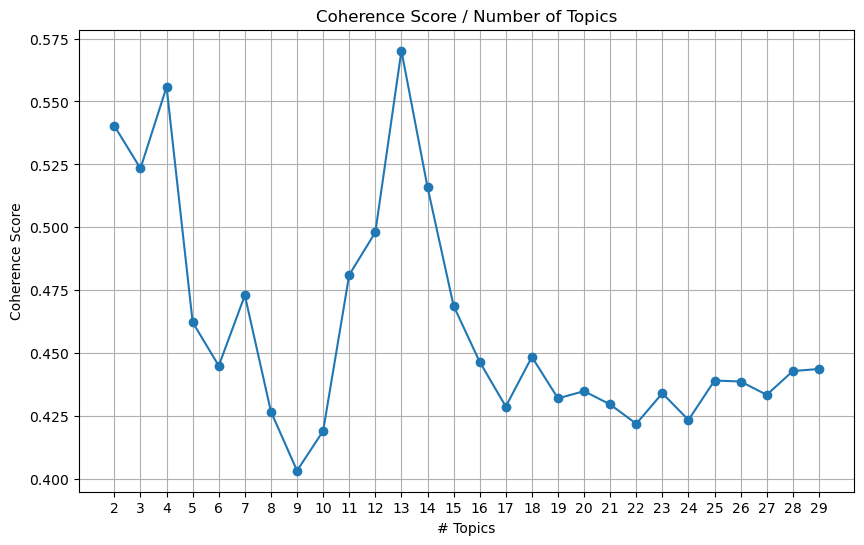

In [3]:
data = pd.read_csv('/Users/beenayaknon/Desktop/pyget/dataset/category_with_document.csv')

# Preprocess documents
data['processed_Document'] = data['Document'].apply(preprocess_text)
texts = data['processed_Document'].tolist()

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=2)
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics_list = range(10, 50)
coherence_scores = []

for num_topics in num_topics_list:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, random_state=4583, 
                         chunksize=20, num_topics=num_topics, passes=200, iterations=400)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Coherence Score / Number of Topics')
plt.xlabel('# Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()


λ = 0; the terms are ranked purely by their probability within the topic

λ = 1; the terms are ranked purely by their overall term frequency across all topics (most common terms in the dataset)

In [ ]:
dickens_visual = gensimvisualize.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(dickens_visual)

LDA modeling for each category

In [ ]:

data = pd.read_csv('dataset/category_with_document.csv')

data['processed_Document'] = data['Document'].apply(preprocess_text)
# group documents by category
grouped_data = data.groupby('Category')['processed_Document'].apply(list).reset_index()

models = {}

for _, row in grouped_data.iterrows():
    category = row['Category']
    texts = row['processed_Document']
    # print(texts[:1])

    # load dictionary
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below = 2)

    # generate corpus as BoW
    corpus = [dictionary.doc2bow(text) for text in texts]

    # train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, chunksize=20, num_topics=7, passes=200, iterations=200)

    print(f"Category: {category}")
    for topic in lda_model.print_topics(num_topics=7, num_words=10):
        print(topic)

    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence Score:', coherence_score)

    models[category] = {
        "lda_model": lda_model,
        "corpus": corpus,
        "dictionary": dictionary,
        "coherence_score": coherence_score
    }
    
    print('\n')

In [ ]:
category = 'Projects practise'

lda_model = models[category]['lda_model']
corpus = models[category]['corpus']
dictionary = models[category]['dictionary']

dickens_visual = gensimvisualize.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(dickens_visual)